In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [4]:
df = pd.read_csv('datasets/weatherAUS.csv', index_col=0)

In [5]:
ciudades = ['Sydney',
            'SydneyAirport',
            'Canberra',
            'Melbourne',
            'MelbourneAirport']

In [6]:
ciudades_df = df[df['Location'].isin(ciudades)]\
                .copy()\
                .reset_index(drop=True)

In [7]:
columnas_a_eliminar = ['Date',"Pressure3pm", "WindGustDir", 'Temp9am', 'MinTemp', 'WindSpeed3pm', 'WindSpeed9am', 'WindDir9am', 'WindDir3pm' ]
df_sin_columnas = ciudades_df.drop(columns=columnas_a_eliminar)


In [8]:
promedio_Pres9am = df_sin_columnas["Pressure9am"].mean()

In [9]:
df_sin_columnas["Pressure9am"].fillna(promedio_Pres9am, inplace=True)

In [10]:
df_sin_columnas.columns

Index(['Location', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'RainfallTomorrow'],
      dtype='object')

In [11]:
df_sin_columnas['MaxTemp'].interpolate(method='linear', inplace=True)

In [12]:
df_sin_columnas['Evaporation']\
    .fillna(
        df_sin_columnas['Evaporation'].mean(),
        inplace=True)

In [13]:
df_sin_columnas['Sunshine']\
    .fillna(
        df_sin_columnas['Sunshine'].median(),
        inplace=True)

In [14]:
df_sin_columnas['WindGustSpeed']\
    .fillna(
        df_sin_columnas['WindGustSpeed'].median(),
        inplace=True)

In [15]:
df_sin_columnas['Humidity9am']\
    .fillna(
        df_sin_columnas['Humidity9am'].mean(),
        inplace=True)

In [16]:
df_sin_columnas['Humidity3pm']\
    .fillna(
        df_sin_columnas['Humidity3pm'].mean(),
        inplace=True)

In [17]:
df_sin_columnas['Pressure9am']\
    .fillna(
        df_sin_columnas['Pressure9am'].mean(),
        inplace=True)

In [18]:
df_sin_columnas['Cloud9am']\
    .fillna(
        df_sin_columnas['Cloud9am'].median(),
        inplace=True)

In [19]:
df_sin_columnas['Cloud3pm']\
    .fillna(
        df_sin_columnas['Cloud3pm'].median(),
        inplace=True)

In [20]:
df_sin_columnas['Temp3pm']\
    .fillna(
        df_sin_columnas['Temp3pm'].mean(),
        inplace=True)

In [21]:
df_sin_nan = df_sin_columnas.dropna()
    

In [22]:
df_nom = pd.get_dummies(df_sin_nan, prefix=["LlueveHoy", "LlueveMan", "ciudades"], columns=["RainToday", "RainTomorrow", "Location"])

In [23]:
# Definir las variables independientes y la dependiente
X = df_nom[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am',  'Cloud9am',
       'Cloud3pm', 'Temp3pm',
       'LlueveHoy_Yes'
       ]]
Y = df_nom['LlueveMan_Yes']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_entreno, X_testeo, Y_entreno, Y_testeo = train_test_split(X, Y, test_size=0.20, random_state= 1)

In [24]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= 1)
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')#class_weight='balanced': aca balanceo las clases esto lo q hace en este ejemplo es multiplicar por 9 el COSTO de la clase minoritaria.
logistic_model.fit(X_entreno, Y_entreno)
y_pred = logistic_model.predict(X_testeo)

print("Resultados con regresión logística\n")
print(classification_report(Y_testeo, y_pred))
print(confusion_matrix(Y_testeo, y_pred))


Resultados con regresión logística

              precision    recall  f1-score   support

       False       0.91      0.78      0.84      2344
        True       0.49      0.74      0.59       664

    accuracy                           0.77      3008
   macro avg       0.70      0.76      0.71      3008
weighted avg       0.82      0.77      0.78      3008

[[1820  524]
 [ 170  494]]


c:\Users\edus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model.predict_proba(X_testeo)[:,1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_testeo, y_probs)
roc_auc = auc(fpr, tpr)

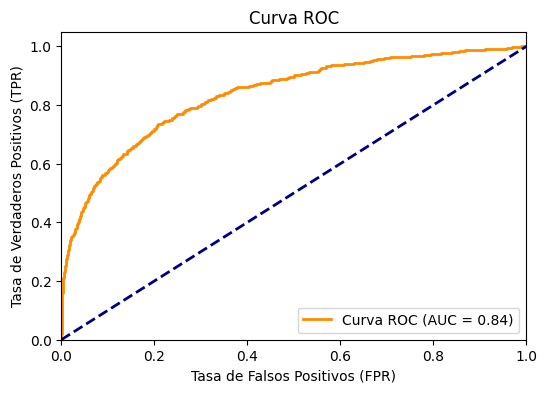

In [26]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [27]:
roc_auc

0.8365263528516798

In [28]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.26621160e-04,
        4.26621160e-04, 8.53242321e-04, 8.53242321e-04, 1.27986348e-03,
        1.27986348e-03, 1.70648464e-03, 1.70648464e-03, 2.13310580e-03,
        2.13310580e-03, 2.55972696e-03, 2.55972696e-03, 2.98634812e-03,
        2.98634812e-03, 3.83959044e-03, 3.83959044e-03, 4.26621160e-03,
        4.26621160e-03, 4.69283276e-03, 4.69283276e-03, 5.11945392e-03,
        5.11945392e-03, 5.54607509e-03, 5.54607509e-03, 5.97269625e-03,
        5.97269625e-03, 7.25255973e-03, 7.25255973e-03, 7.67918089e-03,
        7.67918089e-03, 8.10580205e-03, 8.10580205e-03, 8.53242321e-03,
        8.53242321e-03, 9.38566553e-03, 9.38566553e-03, 9.81228669e-03,
        9.81228669e-03, 1.02389078e-02, 1.02389078e-02, 1.10921502e-02,
        1.10921502e-02, 1.15187713e-02, 1.15187713e-02, 1.23720137e-02,
        1.23720137e-02, 1.32252560e-02, 1.32252560e-02, 1.36518771e-02,
        1.36518771e-02, 1.49317406e-02, 1.49317406e-02, 1.535836

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_entreno, Y_entreno)

In [30]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)
y_pred = logistic_model.predict(X_testeo)

print(classification_report(Y_testeo, y_pred))
print(confusion_matrix(Y_testeo, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.78      0.84      2344
        True       0.49      0.75      0.59       664

    accuracy                           0.77      3008
   macro avg       0.70      0.76      0.72      3008
weighted avg       0.82      0.77      0.79      3008

[[1825  519]
 [ 169  495]]


c:\Users\edus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
rf_model = RandomForestClassifier(random_state=42)#
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_testeo)

print("Resultados para un Random Forest con Oversampling:\n")
print(classification_report(Y_testeo, y_pred))
print(confusion_matrix(Y_testeo, y_pred))

Resultados para un Random Forest con Oversampling:

              precision    recall  f1-score   support

       False       0.89      0.91      0.90      2344
        True       0.66      0.60      0.63       664

    accuracy                           0.84      3008
   macro avg       0.77      0.76      0.76      3008
weighted avg       0.84      0.84      0.84      3008

[[2138  206]
 [ 266  398]]


###MODELO BASE##

In [32]:
X_Base = df_nom[[ 'LlueveHoy_Yes' ]]
Y_Base = df_nom['LlueveMan_No'] 


X_entreno_b, X_testeo_b, Y_entreno_b, Y_testeo_b = train_test_split(X_Base, Y_Base, test_size=0.20, random_state= 1)

In [33]:

logistic_model_Base = LogisticRegression(random_state=42) 
logistic_model_Base.fit(X_entreno_b, Y_entreno_b)
y_pred_b = logistic_model_Base.predict(X_testeo_b)

print("Resultados con regresión logística\n")
print(classification_report(Y_testeo_b, y_pred_b))                                                                                                                     
print(confusion_matrix(Y_testeo_b, y_pred_b))

Resultados con regresión logística

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       664
        True       0.78      1.00      0.88      2344

    accuracy                           0.78      3008
   macro avg       0.39      0.50      0.44      3008
weighted avg       0.61      0.78      0.68      3008

[[   0  664]
 [   0 2344]]


c:\Users\edus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\edus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\edus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,